In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import seaborn as sb
import plotly.express as px

In [17]:
cervical_cancer_file = pd.read_csv("../data/risk_factors_cervical_cancer.csv")
cervical_cancer_file

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [18]:
biopsy_results = list(cervical_cancer_file['Biopsy'])
biopsy_results

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [19]:
np.unique(biopsy_results)

array([0, 1])

In [20]:
cervical_cancer_file.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [21]:
cervical_cancer_file.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [22]:
columns = cervical_cancer_file.columns
for i in range(len(columns)):

    check_nan = cervical_cancer_file[columns[i]].isnull().values.any()
    if(check_nan):
        print("NaN")

In [23]:
print(len(columns))

36


In [24]:
for i in range(len(columns)):
    
    print("Column name", columns[i])
    vals = cervical_cancer_file[columns[i]]

    unique, counts = np.unique(vals, return_counts=True)
    d = dict(zip(unique, counts))
    # print(d)
    sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
    vals = list(sorted_d.values())
    print(vals)
    if(columns[i] != "Time since first diagnosis" or columns[i] != "Time since last diagnosis"):
        if("?" in d):
            cervical_cancer_file[columns[i]] = cervical_cancer_file[columns[i]].replace('?',vals[0])
    
    print(np.unique(list(cervical_cancer_file[columns[i]])))


Column name Age
[54, 50, 46, 45, 44, 39, 39, 38, 37, 35, 35, 33, 33, 30, 29, 28, 27, 24, 24, 23, 21, 18, 17, 13, 12, 9, 9, 6, 6, 6, 5, 5, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 59 70 79 84]
Column name Number of sexual partners
[272, 208, 206, 78, 44, 26, 9, 7, 4, 1, 1, 1, 1]
['1.0' '10.0' '15.0' '2.0' '272' '28.0' '3.0' '4.0' '5.0' '6.0' '7.0'
 '8.0' '9.0']
Column name First sexual intercourse
[163, 151, 137, 121, 79, 60, 37, 25, 20, 9, 9, 7, 7, 6, 6, 6, 5, 3, 2, 2, 2, 1]
['10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '163' '17.0' '18.0'
 '19.0' '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0'
 '29.0' '32.0']
Column name Num of pregnancies
[270, 240, 139, 74, 56, 35, 18, 16, 6, 2, 1, 1]
['0.0' '1.0' '10.0' '11.0' '2.0' '270' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0']
Column name Smokes
[722, 123, 13]
['0.0' '1.0' '722']
Column name Smokes (years)
[722, 15, 

In [25]:
for i in range(len(columns)):

    cervical_cancer_file[columns[i]] = pd.to_numeric(cervical_cancer_file[columns[i]])

In [26]:
data_summary = cervical_cancer_file.describe()
data_summary

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,10.693473,18.186480,19.749417,11.082751,12.140635,11.385672,61.106061,35.832534,89.824009,...,722.383450,722.356643,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,46.249014,13.434841,66.180838,88.230558,88.191977,88.219946,159.432114,88.602352,225.902118,...,215.262557,215.351545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,787.000000,787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,787.000000,787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,...,787.000000,787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,272.000000,163.000000,270.000000,722.000000,722.000000,722.000000,481.000000,269.000000,658.000000,...,787.000000,787.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


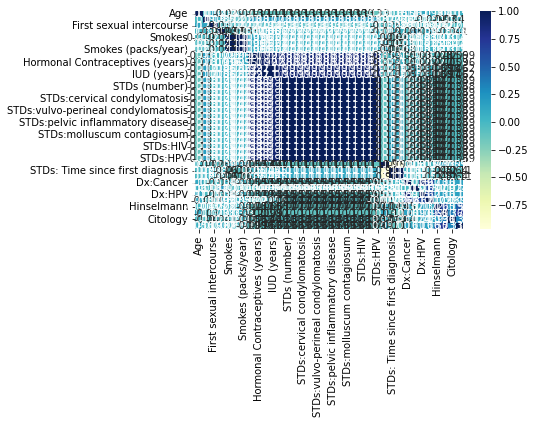

In [27]:
dataplot = sb.heatmap(cervical_cancer_file.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [28]:
cervical_cancer_file.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.018853,0.124851,0.003377,-0.028612,-0.018803,-0.025540,-0.133284,-0.122355,-0.107622,...,-0.015497,-0.015361,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,-0.018853,1.000000,0.125177,0.034948,-0.020336,-0.020573,-0.020684,0.178681,0.177821,0.167471,...,0.026103,0.026115,-0.025069,-0.017632,-0.024893,-0.029153,-0.003476,-0.030388,-0.040298,-0.018545
First sexual intercourse,0.124851,0.125177,1.000000,-0.032275,-0.011776,-0.011863,-0.011626,-0.017285,-0.018629,-0.014415,...,0.027515,0.027526,0.000995,-0.015914,-0.003850,-0.007620,-0.021733,-0.026530,-0.022906,-0.021709
Num of pregnancies,0.003377,0.034948,-0.032275,1.000000,-0.033377,-0.033372,-0.033024,-0.002285,-0.003574,0.086158,...,0.027178,0.027201,-0.037930,0.204483,-0.037684,0.098637,0.017885,0.038323,-0.040661,0.066603
Smokes,-0.028612,-0.020336,-0.011776,-0.033377,1.000000,0.999065,0.999727,0.096702,0.096001,0.062063,...,-0.066692,-0.067447,0.048374,-0.012940,0.048466,0.036553,0.022792,0.030080,0.014403,0.006608
Smokes (years),-0.018803,-0.020573,-0.011863,-0.033372,0.999065,1.000000,0.999462,0.095808,0.095192,0.061526,...,-0.070468,-0.071220,0.050883,-0.014182,0.050999,0.034533,0.025909,0.034190,0.014093,0.009314
Smokes (packs/year),-0.025540,-0.020684,-0.011626,-0.033024,0.999727,0.999462,1.000000,0.096158,0.095490,0.061753,...,-0.067179,-0.067933,0.051120,-0.013296,0.051167,0.035975,0.023316,0.030308,0.014530,0.007108
Hormonal Contraceptives,-0.133284,0.178681,-0.017285,-0.002285,0.096702,0.095808,0.096158,1.000000,0.999257,0.924268,...,0.050199,0.050226,-0.055475,-0.004592,-0.030925,-0.021760,-0.078161,-0.116596,-0.056397,-0.099291
Hormonal Contraceptives (years),-0.122355,0.177821,-0.018629,-0.003574,0.096001,0.095192,0.095490,0.999257,1.000000,0.924314,...,0.051305,0.051334,-0.053336,-0.004456,-0.028569,-0.022249,-0.076652,-0.113366,-0.053370,-0.096097
IUD,-0.107622,0.167471,-0.014415,0.086158,0.062063,0.061526,0.061753,0.924268,0.924314,1.000000,...,0.045338,0.045368,-0.058024,0.059162,-0.034394,0.015160,-0.064718,-0.097774,-0.046183,-0.062329


<AxesSubplot:>

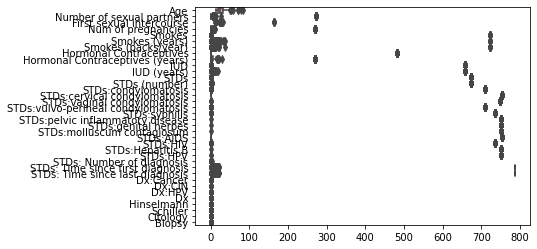

In [37]:
sb.boxplot(data = cervical_cancer_file[columns], orient='h')

In [30]:
cervical_cancer_file.to_csv('../data/pre-processed_cancer.csv')